In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk


# Emotion Finder


## Dataset visualization

Let's open each file. We will explore the dataset together.

In [66]:

train = pd.read_csv("data/train.txt", delimiter=";", names=["sentence", "emotion"])
test = pd.read_csv("data/test.txt", delimiter=";", names=["sentence", "emotion"])
val = pd.read_csv("data/val.txt", delimiter=";", names=["sentence", "emotion"])
train.head()

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


We will concatenate the three datasets to make our proprocessing easier.

In [67]:
data = pd.concat([train, test, val], keys=["train", "test", "val"])
data.head()

sentence  emotion
train 0                            i didnt feel humiliated  sadness
      1  i can go from feeling so hopeless to so damned...  sadness
      2   im grabbing a minute to post i feel greedy wrong    anger
      3  i am ever feeling nostalgic about the fireplac...     love
      4                               i am feeling grouchy    anger

### Duplicated rows

This part will ensure that our datasety has no duplicated lines and no sentence linked to multiple emotion.

In [68]:
print(f"nb of duplicated rows : {np.sum(data.duplicated())}")

data[data.duplicated()].head()

nb of duplicated rows : 1


,,sentence,emotion
train,13846,i feel more adventurous willing to take risks ...,joy


In [69]:
data = data.drop_duplicates()
print(f"nb of duplicated rows : {np.sum(data.duplicated())}")

nb of duplicated rows : 0


Now, let's check if some sentences are related to multiple emotions.

In [70]:
print(f"nb of duplicated rows : {np.sum(data['sentence'].duplicated())}")

nb of duplicated rows : 51


In [71]:
duplicate = data[data['sentence'].duplicated()]
duplicate.head()

sentence   emotion
train 5067  i feel on the verge of tears from weariness i ...       joy
      6133              i still feel a craving for sweet food      love
      6563  i tend to stop breathing when i m feeling stre...     anger
      7623  i was intensely conscious of how much cash i h...   sadness
      7685  im still not sure why reilly feels the need to...  surprise

We have multiple ways of handling the duplicated inputs for different outputs:

* Choosing manually
* Taking the first emotion and delete the other rows
* Deleting every duplicated rows

In our project, we will delete only the next other rows of a duplicated one.

In [73]:
data = data[~data['sentence'].duplicated()]
data.shape

(19948, 2)

### Analyze of the emotion distribution

In [80]:
counts = data.groupby(level=0)["emotion"].value_counts()
p = counts / counts.groupby(level=0).transform('sum')

print(p)

       emotion 
test   joy         0.346908
       sadness     0.291101
       anger       0.137758
       fear        0.112619
       love        0.078934
       surprise    0.032680
train  joy         0.335024
       sadness     0.292066
       anger       0.134949
       fear        0.121047
       love        0.081345
       surprise    0.035569
val    joy         0.351759
       sadness     0.276382
       anger       0.137688
       fear        0.106533
       love        0.087437
       surprise    0.040201
Name: count, dtype: float64


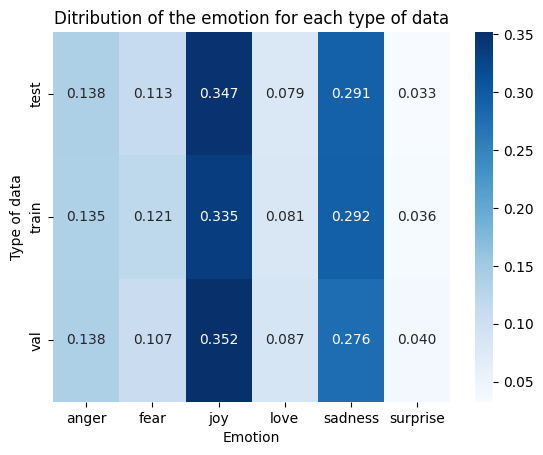

In [93]:

s = sns.heatmap(p.unstack(), annot=True, fmt='.3f', cmap='Blues')
s.set_xlabel('Emotion', fontsize=10)
s.set_ylabel('Type of data', fontsize=10)# counts.plot(kind="bar",xlabel="Emotion", ylabel="Number", title="Number of occurence of each emotion")
s.set_title("Ditribution of the emotion for each type of data")
print()

We can see that the distribution of each emotion is almost the same for each category. However, the distribution for each emotion is not the same.
We're lacking of sentences with suprise and love emotion. 

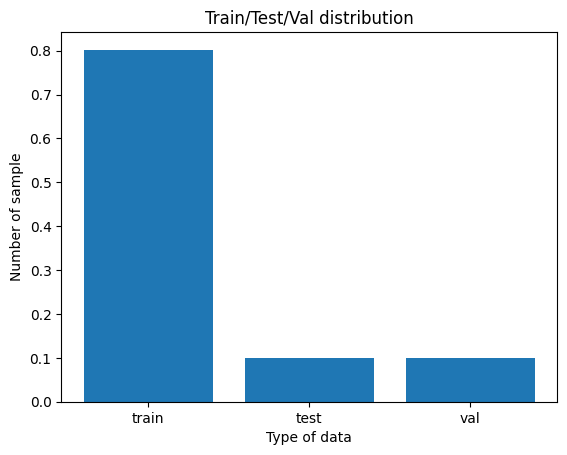

In [94]:
plt.bar(x=["train", "test", "val"], height=[train.size / data.size, test.size / data.size, val.size / data.size])
plt.xlabel("Type of data")
plt.ylabel("Number of sample")
plt.title("Train/Test/Val distribution")
plt.show()

## Dataset processing

Processing our data is an important part for an nlp model. Our data has to go through multiple steps before going into the model.
Theses steps can be see in this part.

### Tokenizer


Models takes numbers as an input. 
Therefore, we need a way to change our sentences with words into numbers.
Introducing the concept of token used by tokenizers, we can change our words into numbers.
the performance can vary a lot depending on the way you tokenize the sentence.

In order to make the process faster, we will tokenize words instead of letters. First let's check if each word present in test and val is present in train.

In [172]:
def replace(s: str) -> str:
    return s.replace("...", '. ').strip('\n').replace("\n", "")

In [175]:
data.loc["train"]['sentence'].to_string(index=False)

'                           i didnt feel humiliatedi can go from feeling so hopeless to so damned ...  im grabbing a minute to post i feel greedy wrongi am ever feeling nostalgic about the fireplace...                              i am feeling grouchyive been feeling a little burdened lately wasnt...ive been taking or milligrams or times recommen...i feel as confused about life as a teenager or ...i have been with petronas for years i feel that...                               i feel romantic tooi feel like i have to make the suffering i m se...i do feel that running is a divine experience a...i think it s the easiest time of year to feel d...                i feel low energy i m just thirstyi have immense sympathy with the general point ...   i do not feel reassured anxiety is on each side              i didnt really feel that embarrassed           i feel pretty pathetic most of the timei started feeling sentimental about dolls i had...i now feel compromised and skeptical of the val..

## Model Creation

## Training

## Evaluation